# Risk Parity - Opportunity dataset

Carrie Little

### Import Necessary Libraries

In [1]:
# Carrie Little - AAI5000 Final Project Code
#
# Import All Necessary Libraries
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt   
import seaborn as sns  
import scipy.stats as stats          
import cvxpy as cp

### Load Opportunity Dataset

In [2]:
# Carrie Little - AAI5000 Final Project Code
#
# Load Opportunity Dataset
df = pd.read_csv('Opportunity_Set.csv', parse_dates=['Date'], index_col='Date')      # Load Dataset as Dataframe
print(df.head())                                                                     # Diaplay 1st 5 inDataframe

            Vanguard LifeStrategy Income Fund (VASIX)  \
Date                                                    
2014-11-30                                     0.0094   
2014-12-31                                    -0.0005   
2015-01-31                                     0.0141   
2015-02-28                                     0.0033   
2015-03-31                                     0.0018   

            Vanguard Total World Stock ETF (VT)  \
Date                                              
2014-11-30                               0.0126   
2014-12-31                              -0.0199   
2015-01-31                              -0.0163   
2015-02-28                               0.0595   
2015-03-31                              -0.0121   

            PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)  \
Date                                                       
2014-11-30                                        0.0414   
2014-12-31                                        0.0612   
20

### Dataframe Info

In [3]:
# Carrie Little - AAI5000 Final Project Code
#
# Dataframe Info
df.info()                                                                            # General information about the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2014-11-30 to 2024-08-31
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Vanguard LifeStrategy Income Fund (VASIX)         118 non-null    float64
 1   Vanguard Total World Stock ETF (VT)               118 non-null    float64
 2   PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)      118 non-null    float64
 3   AQR Diversified Arbitrage I (ADAIX)               118 non-null    float64
 4   iShares Gold Trust (IAU)                          118 non-null    float64
 5   Bitcoin Market Price USD (^BTC)                   118 non-null    float64
 6   AQR Risk-Balanced Commodities Strategy I (ARCIX)  118 non-null    float64
 7   AQR Long-Short Equity I (QLEIX)                   118 non-null    float64
 8   AQR Style Premia Alternative I (QSPIX)            118 non-null    float64
 9   AQ

### Descriptive statistics

In [4]:
# Carrie Little - AAI5000 Final Project Code
#
# Descriptive Statistics
# Describe
summary_stats = df.describe()                                                         # Create a Dataframe of Descriptive Statistics
summary_stats                                                                         # Display the Dataframe of Descriptive Statistics

,Vanguard LifeStrategy Income Fund (VASIX),Vanguard Total World Stock ETF (VT),PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ),AQR Diversified Arbitrage I (ADAIX),iShares Gold Trust (IAU),Bitcoin Market Price USD (^BTC),AQR Risk-Balanced Commodities Strategy I (ARCIX),AQR Long-Short Equity I (QLEIX),AQR Style Premia Alternative I (QSPIX),AQR Equity Market Neutral I (QMNIX),AQR Macro Opportunities I (QGMIX),AGF U.S. Market Neutral Anti-Beta (BTAL),AQR Managed Futures Strategy HV I (QMHIX),Invesco DB US Dollar Bullish (UUP),ProShares VIX Mid-Term Futures (VIXM)
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.002883,0.008376,0.001381,0.004370,0.007036,0.066718,0.005475,0.008895,0.005400,0.005330,0.002896,0.001880,0.003564,0.002768,-0.008486
std,0.016261,0.043483,0.060799,0.016923,0.040440,0.221176,0.046905,0.033046,0.038787,0.028727,0.021807,0.042857,0.047422,0.019131,0.093629
min,-0.049200,-0.147600,-0.134300,-0.081500,-0.083600,-0.406000,-0.144200,-0.082100,-0.078100,-0.061400,-0.071200,-0.149600,-0.088500,-0.047300,-0.180100
25%,-0.002900,-0.018850,-0.041300,-0.003275,-0.019725,-0.080100,-0.022500,-0.010925,-0.014750,-0.010275,-0.008550,-0.021775,-0.030075,-0.013000,-0.059250
50%,0.004700,0.012250,0.000800,0.004300,-0.000400,0.046800,0.001600,0.009150,0.000000,0.001550,0.002150,-0.000650,-0.001050,0.004000,-0.018150
75%,0.009700,0.030525,0.037725,0.009775,0.029250,0.182350,0.039500,0.025425,0.017450,0.020950,0.015050,0.026825,0.036000,0.016425,0.020825
max,0.050400,0.123700,0.175900,0.074300,0.112200,0.720000,0.121700,0.115800,0.140800,0.110700,0.066800,0.094800,0.127500,0.048400,0.628900


In [5]:
# Carrie Little - AAI5000 Final Project Code
#
# Display Skew and Kurtosis and Descriptives
from scipy.stats import skew, kurtosis
skewness = skew(df)                                                           # Create an Array of Skewness of each asset
kurt = kurtosis(df)                                                           # Create an Array of Kurtosis of each asset

# Creating a dataframe to display the results
results_df = pd.DataFrame({
    'Mean' : df.mean(),
    'Median' : df.median(),
    'Standard Deviation' : df.std(),
    'Skewness': skewness,
    'Kurtosis': kurt
})

results_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Vanguard LifeStrategy Income Fund (VASIX),0.002883,0.00470,0.016261,-0.240603,1.472664
Vanguard Total World Stock ETF (VT),0.008376,0.01225,0.043483,-0.426024,0.928619
PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ),0.001381,0.00080,0.060799,0.378626,0.262557
AQR Diversified Arbitrage I (ADAIX),0.004370,0.00430,0.016923,0.089222,8.083715
iShares Gold Trust (IAU),0.007036,-0.00040,0.040440,0.374345,-0.113385
Bitcoin Market Price USD (^BTC),0.066718,0.04680,0.221176,0.599982,0.526931
AQR Risk-Balanced Commodities Strategy I (ARCIX),0.005475,0.00160,0.046905,0.105015,0.078234
AQR Long-Short Equity I (QLEIX),0.008895,0.00915,0.033046,0.016090,1.162428
AQR Style Premia Alternative I (QSPIX),0.005400,0.00000,0.038787,1.015599,1.697636
AQR Equity Market Neutral I (QMNIX),0.005330,0.00155,0.028727,0.637322,1.282440


### Histogram

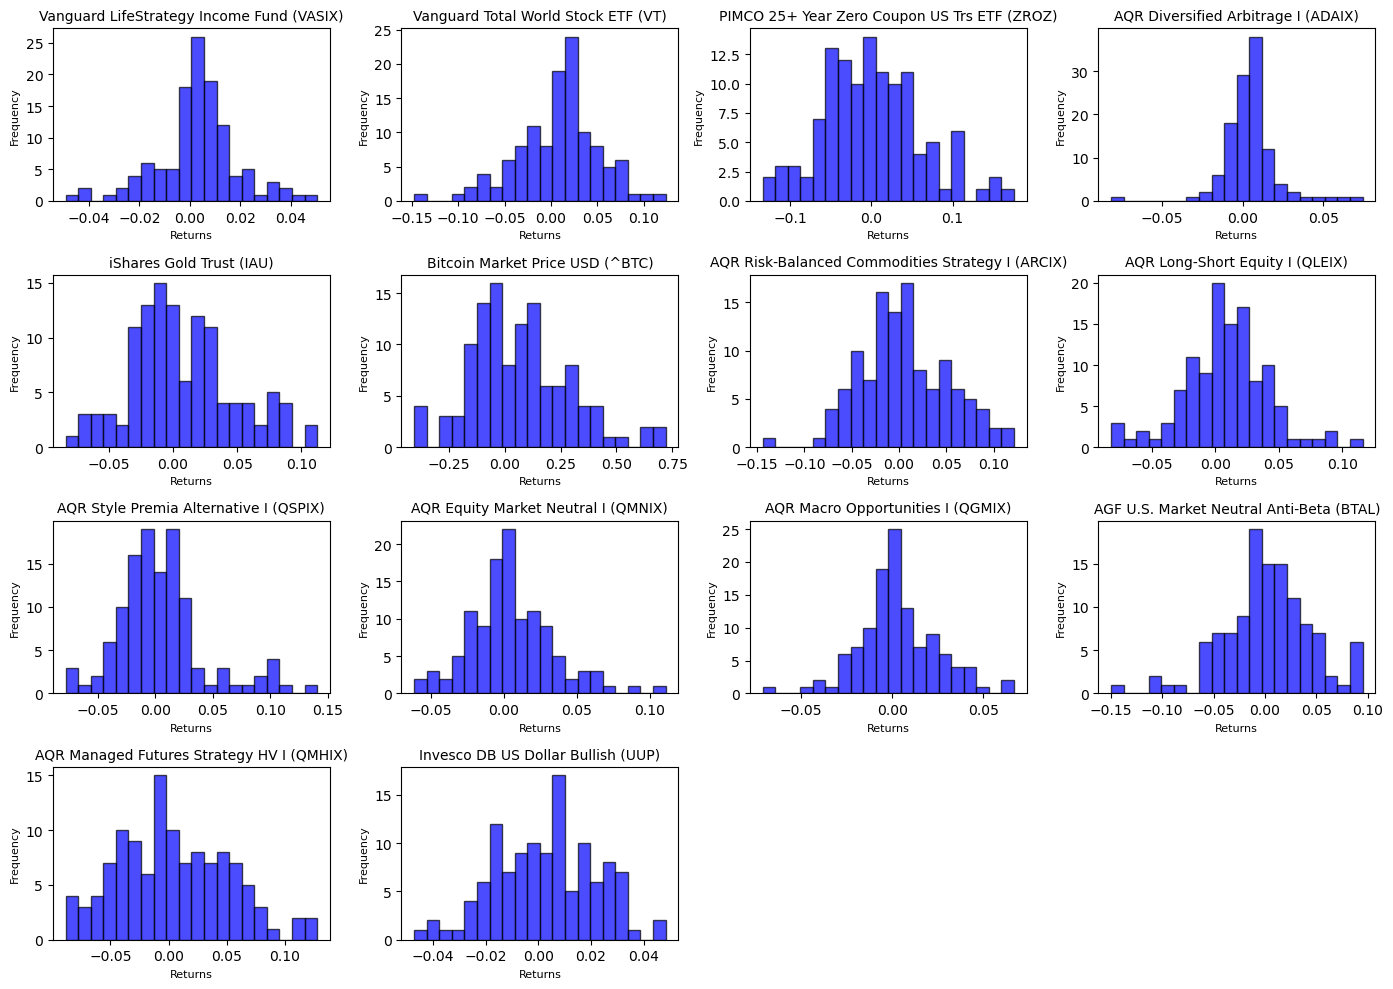

In [6]:
# Carrie Little - AAI5000 Final Project Code
#
# Descriptive Plots
# Histogram
plt.figure(figsize=(14, 10))

# Iterate through each fund and create a histogram
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the last 'DBSCAN_Cluster' column
    plt.subplot(4, 4, i)  # Creating a grid of subplots
    plt.hist(df[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(column, fontsize=10)
    plt.xlabel('Returns', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()


### Boxplot

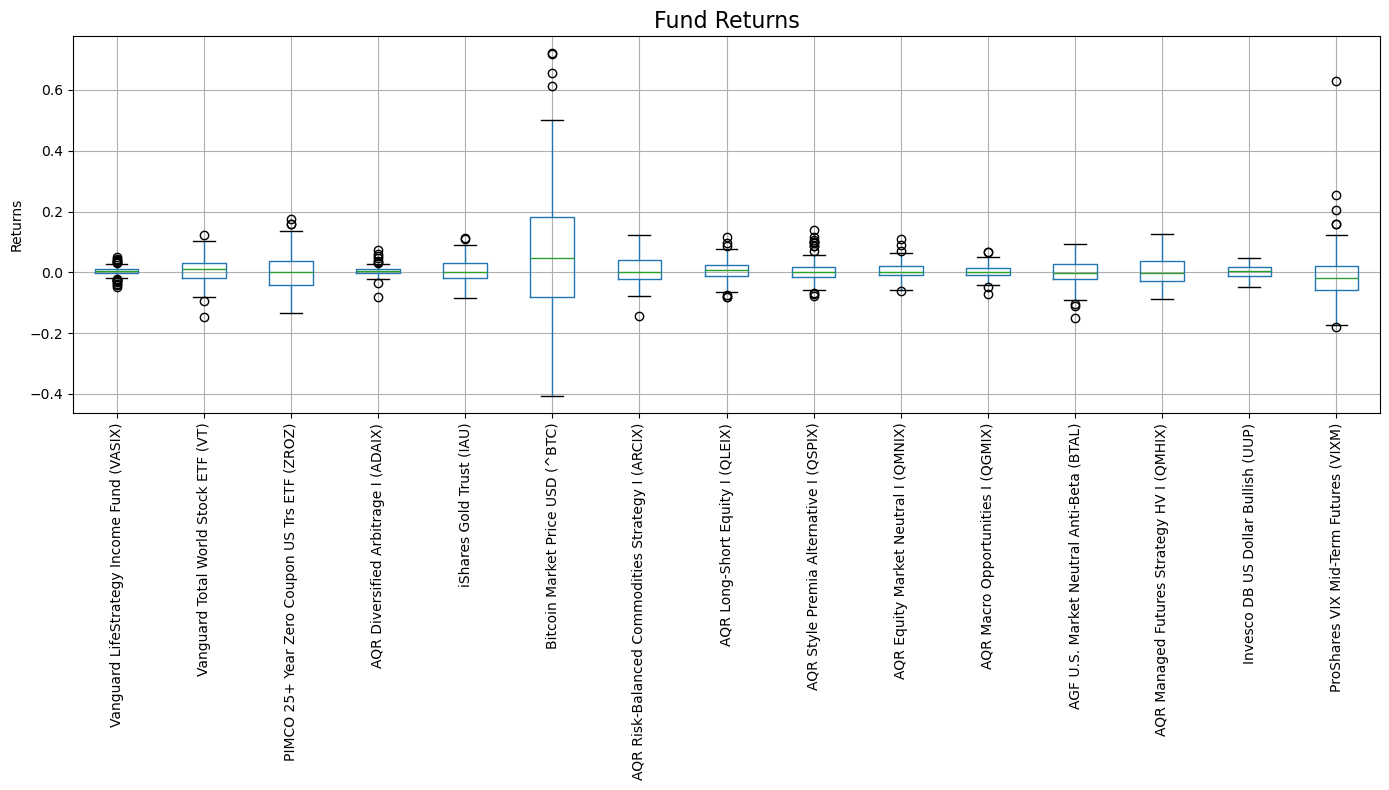

In [7]:
# Carrie Little - AAI5000 Final Project Code
#
# Descriptive Plots
# Boxplot
plt.figure(figsize=(14, 8))

df.boxplot()
plt.title('Fund Returns', fontsize=16)
plt.ylabel('Returns')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Time Series

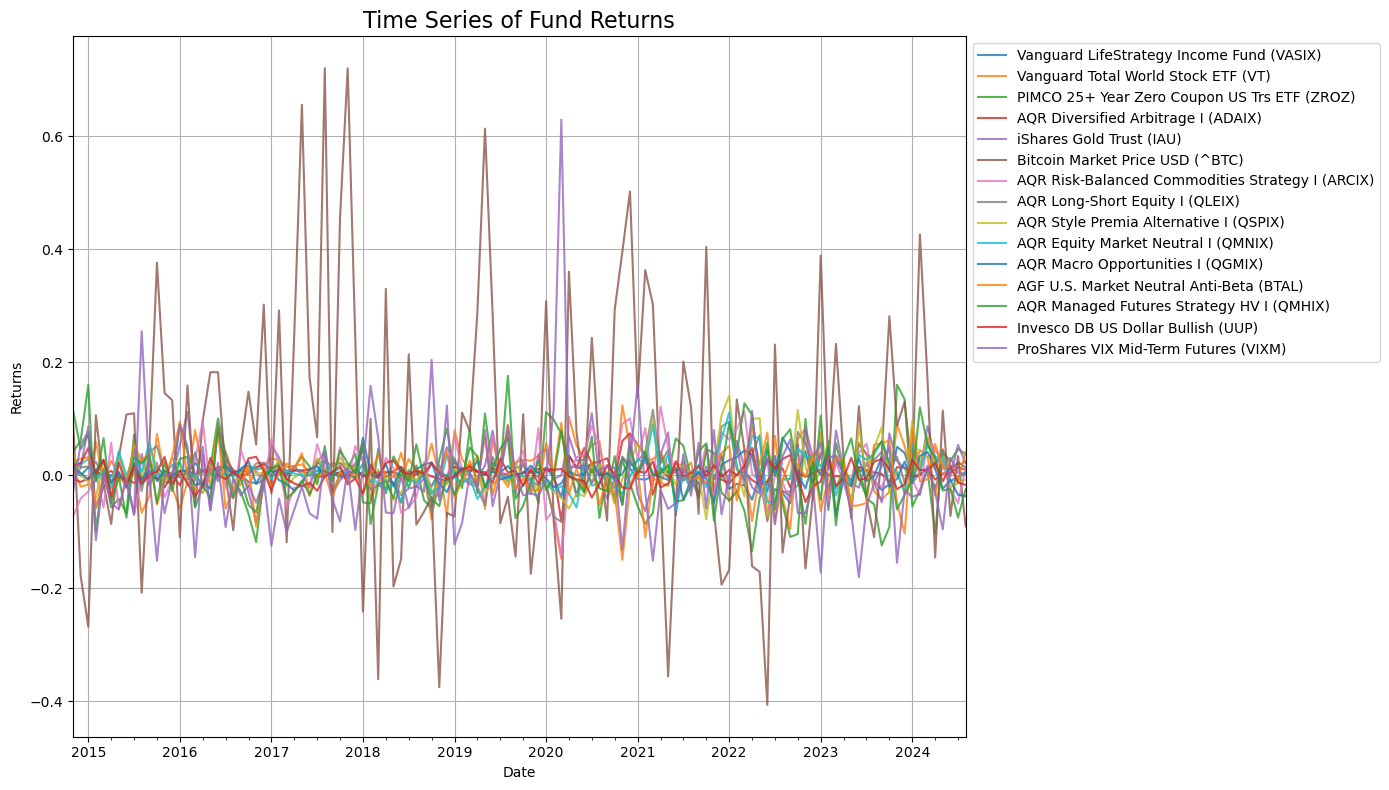

In [8]:
# Carrie Little - AAI5000 Final Project Code
#
# Descriptive Plots
# Plot Time Series
plt.figure(figsize=(14, 8))

df.plot(ax=plt.gca(), legend=False, alpha=0.8)
plt.title('Time Series of Fund Returns', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


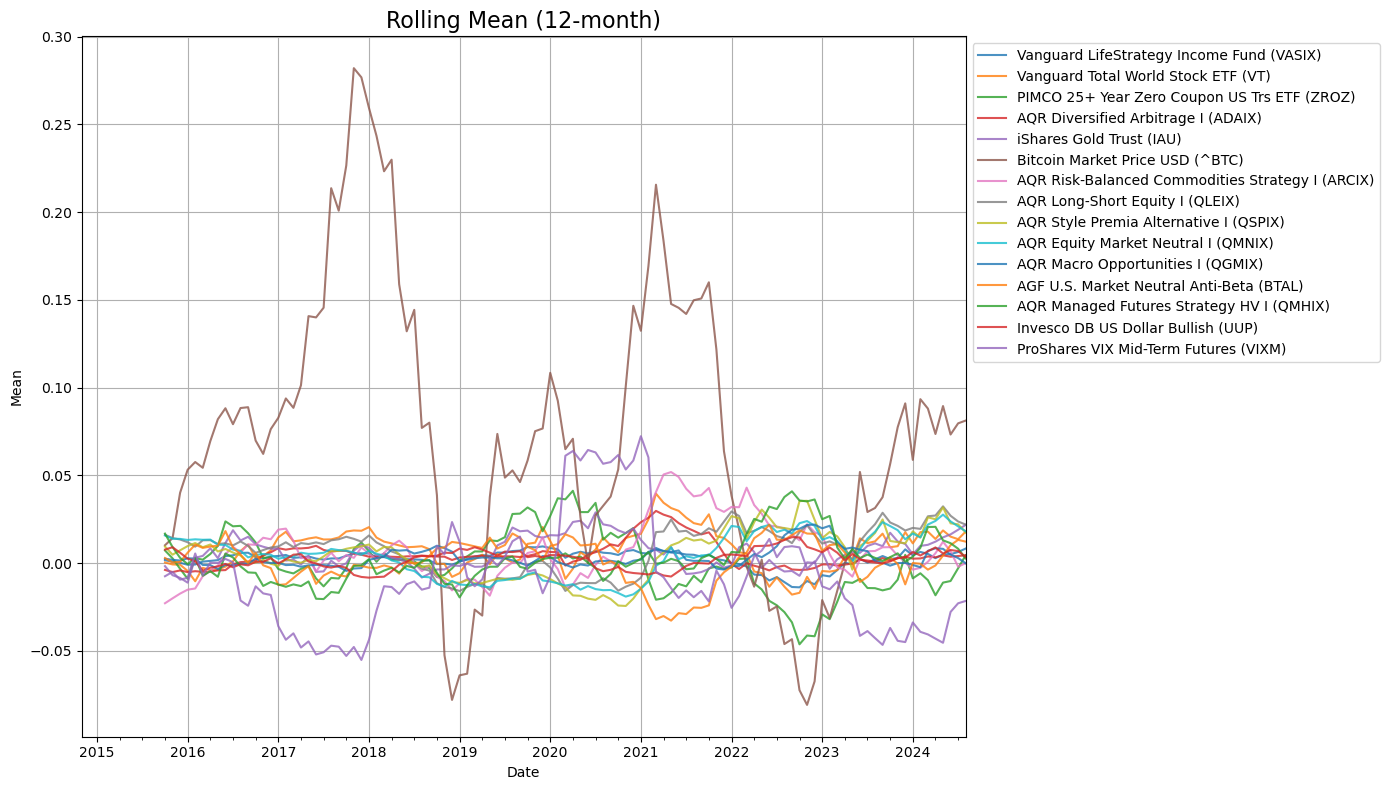

In [9]:
# Carrie Little - AAI5000 Final Project Code
#
# Descriptive Plots
# Plot Time Series - Rolling Mean
rolling_mean = df.rolling(window=12).mean()

plt.figure(figsize=(14, 8))
rolling_mean.plot(ax=plt.gca(), legend=False, alpha=0.8)
plt.title('Rolling Mean (12-month)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Mean')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### Correlation Matrix

In [10]:
# Carrie Little - AAI5000 Final Project Code
#
# Calculate the correlation matrix between the different funds
correlation_matrix = df.corr()
correlation_matrix

,Vanguard LifeStrategy Income Fund (VASIX),Vanguard Total World Stock ETF (VT),PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ),AQR Diversified Arbitrage I (ADAIX),iShares Gold Trust (IAU),Bitcoin Market Price USD (^BTC),AQR Risk-Balanced Commodities Strategy I (ARCIX),AQR Long-Short Equity I (QLEIX),AQR Style Premia Alternative I (QSPIX),AQR Equity Market Neutral I (QMNIX),AQR Macro Opportunities I (QGMIX),AGF U.S. Market Neutral Anti-Beta (BTAL),AQR Managed Futures Strategy HV I (QMHIX),Invesco DB US Dollar Bullish (UUP),ProShares VIX Mid-Term Futures (VIXM)
Vanguard LifeStrategy Income Fund (VASIX),1.000000,0.797772,0.619699,0.393475,0.367826,0.287900,0.247432,0.219485,-0.156694,-0.231995,-0.353287,-0.396115,-0.431737,-0.511921,-0.485680
Vanguard Total World Stock ETF (VT),0.797772,1.000000,0.109775,0.514891,0.136955,0.324214,0.477805,0.460751,0.007711,-0.139991,-0.080182,-0.640102,-0.343223,-0.495324,-0.718278
PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ),0.619699,0.109775,1.000000,-0.008409,0.419812,0.083288,-0.150134,-0.202543,-0.287704,-0.238885,-0.322309,0.119725,-0.114056,-0.225970,0.064462
AQR Diversified Arbitrage I (ADAIX),0.393475,0.514891,-0.008409,1.000000,0.036317,0.277072,0.439992,0.085852,-0.100675,-0.231412,0.115521,-0.489470,-0.214968,-0.274885,-0.345754
iShares Gold Trust (IAU),0.367826,0.136955,0.419812,0.036317,1.000000,0.089561,0.380276,0.033452,-0.152538,-0.013239,-0.158983,0.165409,0.058928,-0.458180,0.099998
Bitcoin Market Price USD (^BTC),0.287900,0.324214,0.083288,0.277072,0.089561,1.000000,0.168327,0.097437,-0.037460,-0.116087,-0.062044,-0.223792,-0.047346,-0.153065,-0.217431
AQR Risk-Balanced Commodities Strategy I (ARCIX),0.247432,0.477805,-0.150134,0.439992,0.380276,0.168327,1.000000,0.358372,0.140950,0.086284,0.107711,-0.319044,-0.040040,-0.468701,-0.341527
AQR Long-Short Equity I (QLEIX),0.219485,0.460751,-0.202543,0.085852,0.033452,0.097437,0.358372,1.000000,0.729026,0.798438,0.070964,-0.181864,0.031753,-0.146403,-0.497014
AQR Style Premia Alternative I (QSPIX),-0.156694,0.007711,-0.287704,-0.100675,-0.152538,-0.037460,0.140950,0.729026,1.000000,0.806121,0.215109,0.158212,0.189893,0.091452,-0.157005
AQR Equity Market Neutral I (QMNIX),-0.231995,-0.139991,-0.238885,-0.231412,-0.013239,-0.116087,0.086284,0.798438,0.806121,1.000000,0.097228,0.231500,0.251190,0.129102,-0.082435


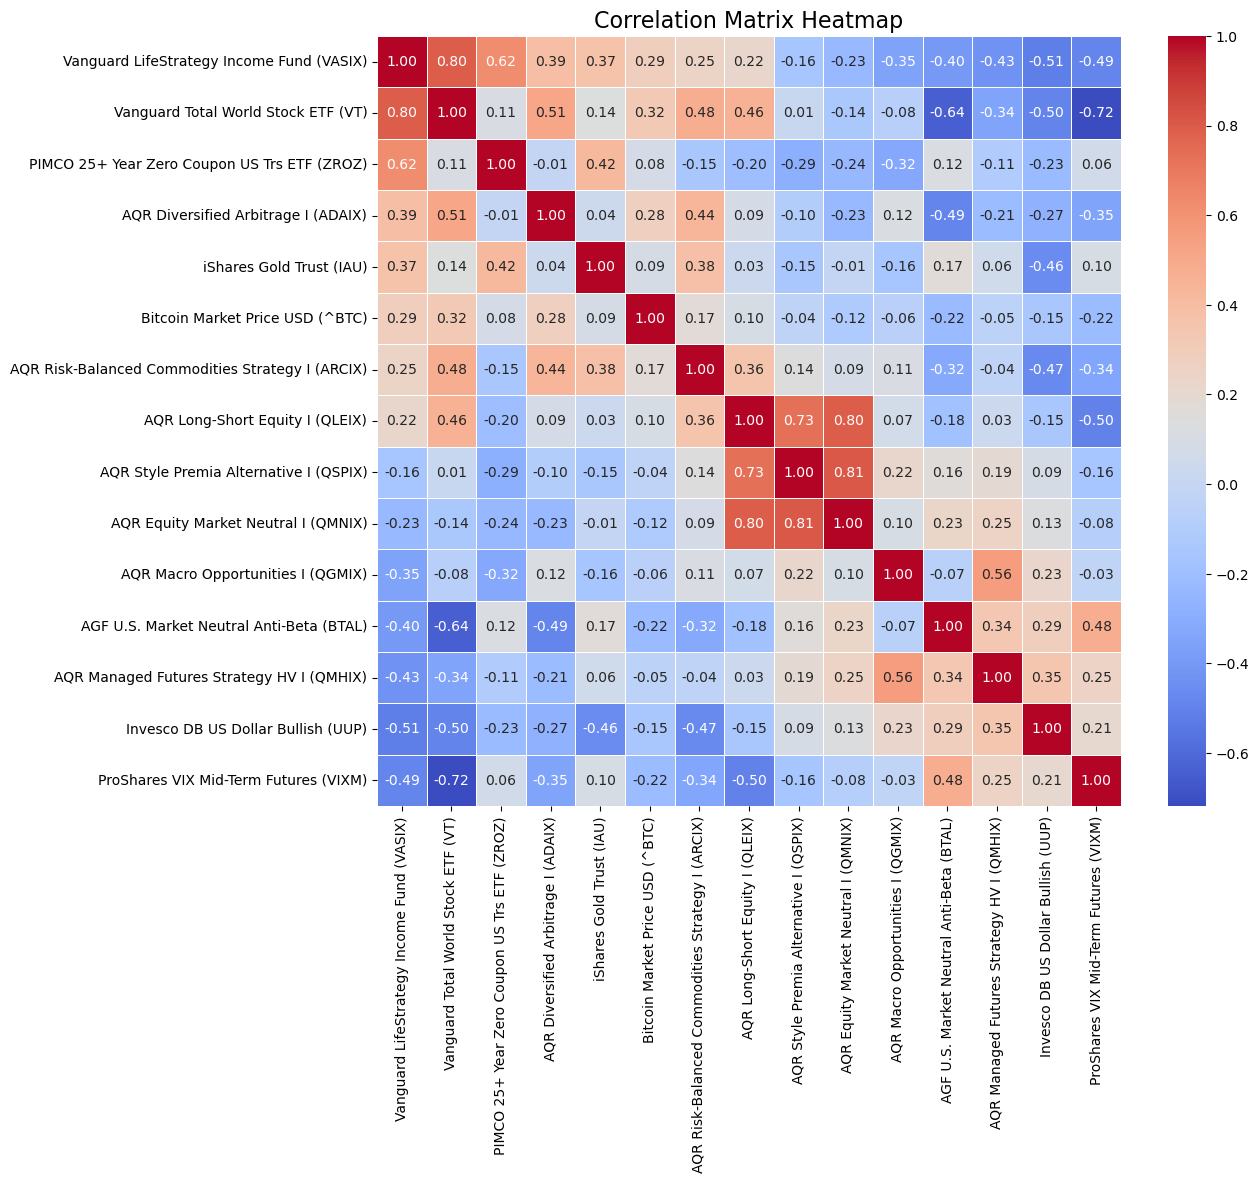

In [11]:
# Carrie Little - AAI5000 Final Project Code
#
# Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

### Kernel Density Estimate

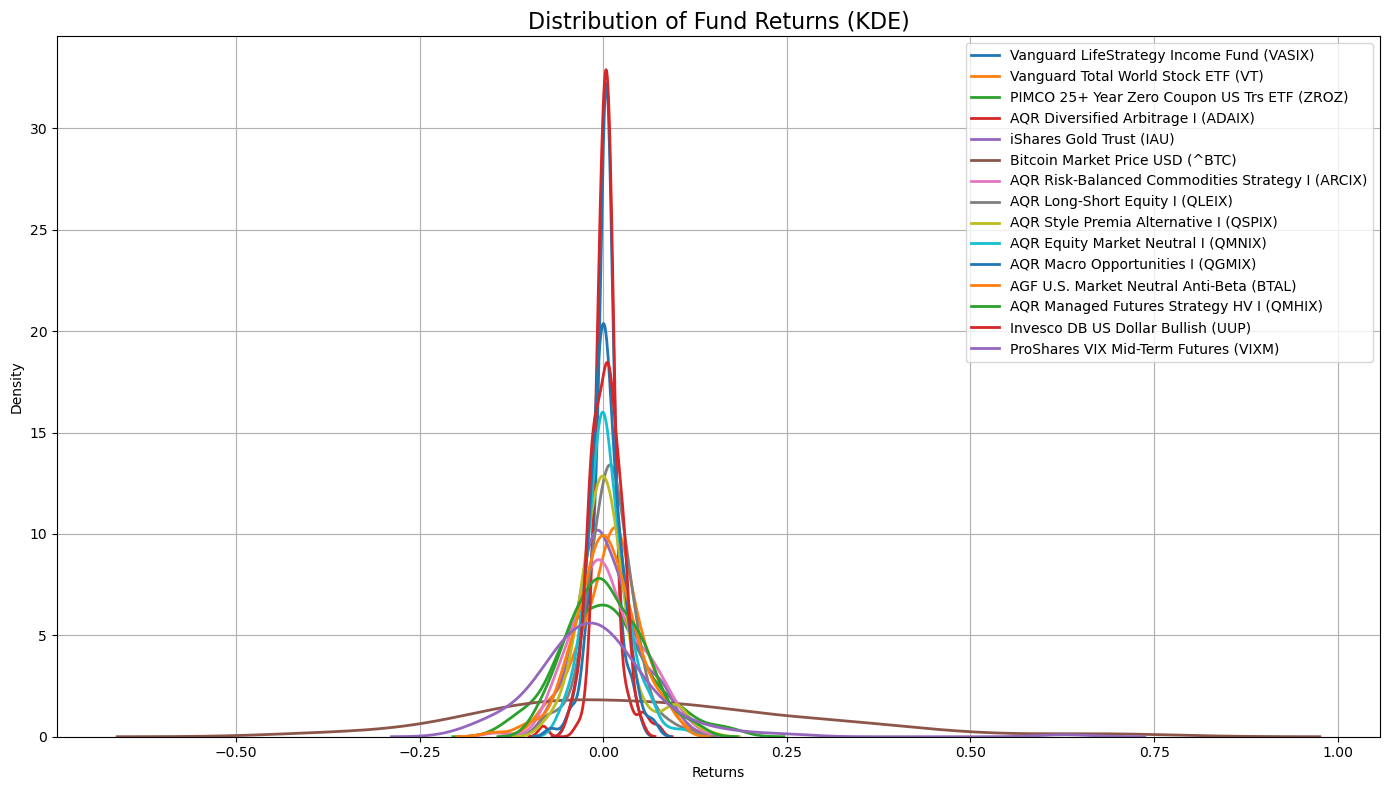

In [12]:
# Carrie Little - AAI5000 Final Project Code
#
# Plot the# Plot the Kernel Density Estimate for each fund
plt.figure(figsize=(14, 8))

for column in df.columns:
    sns.kdeplot(df[column], label=column, linewidth=2)

plt.title('Distribution of Fund Returns (KDE)', fontsize=16)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

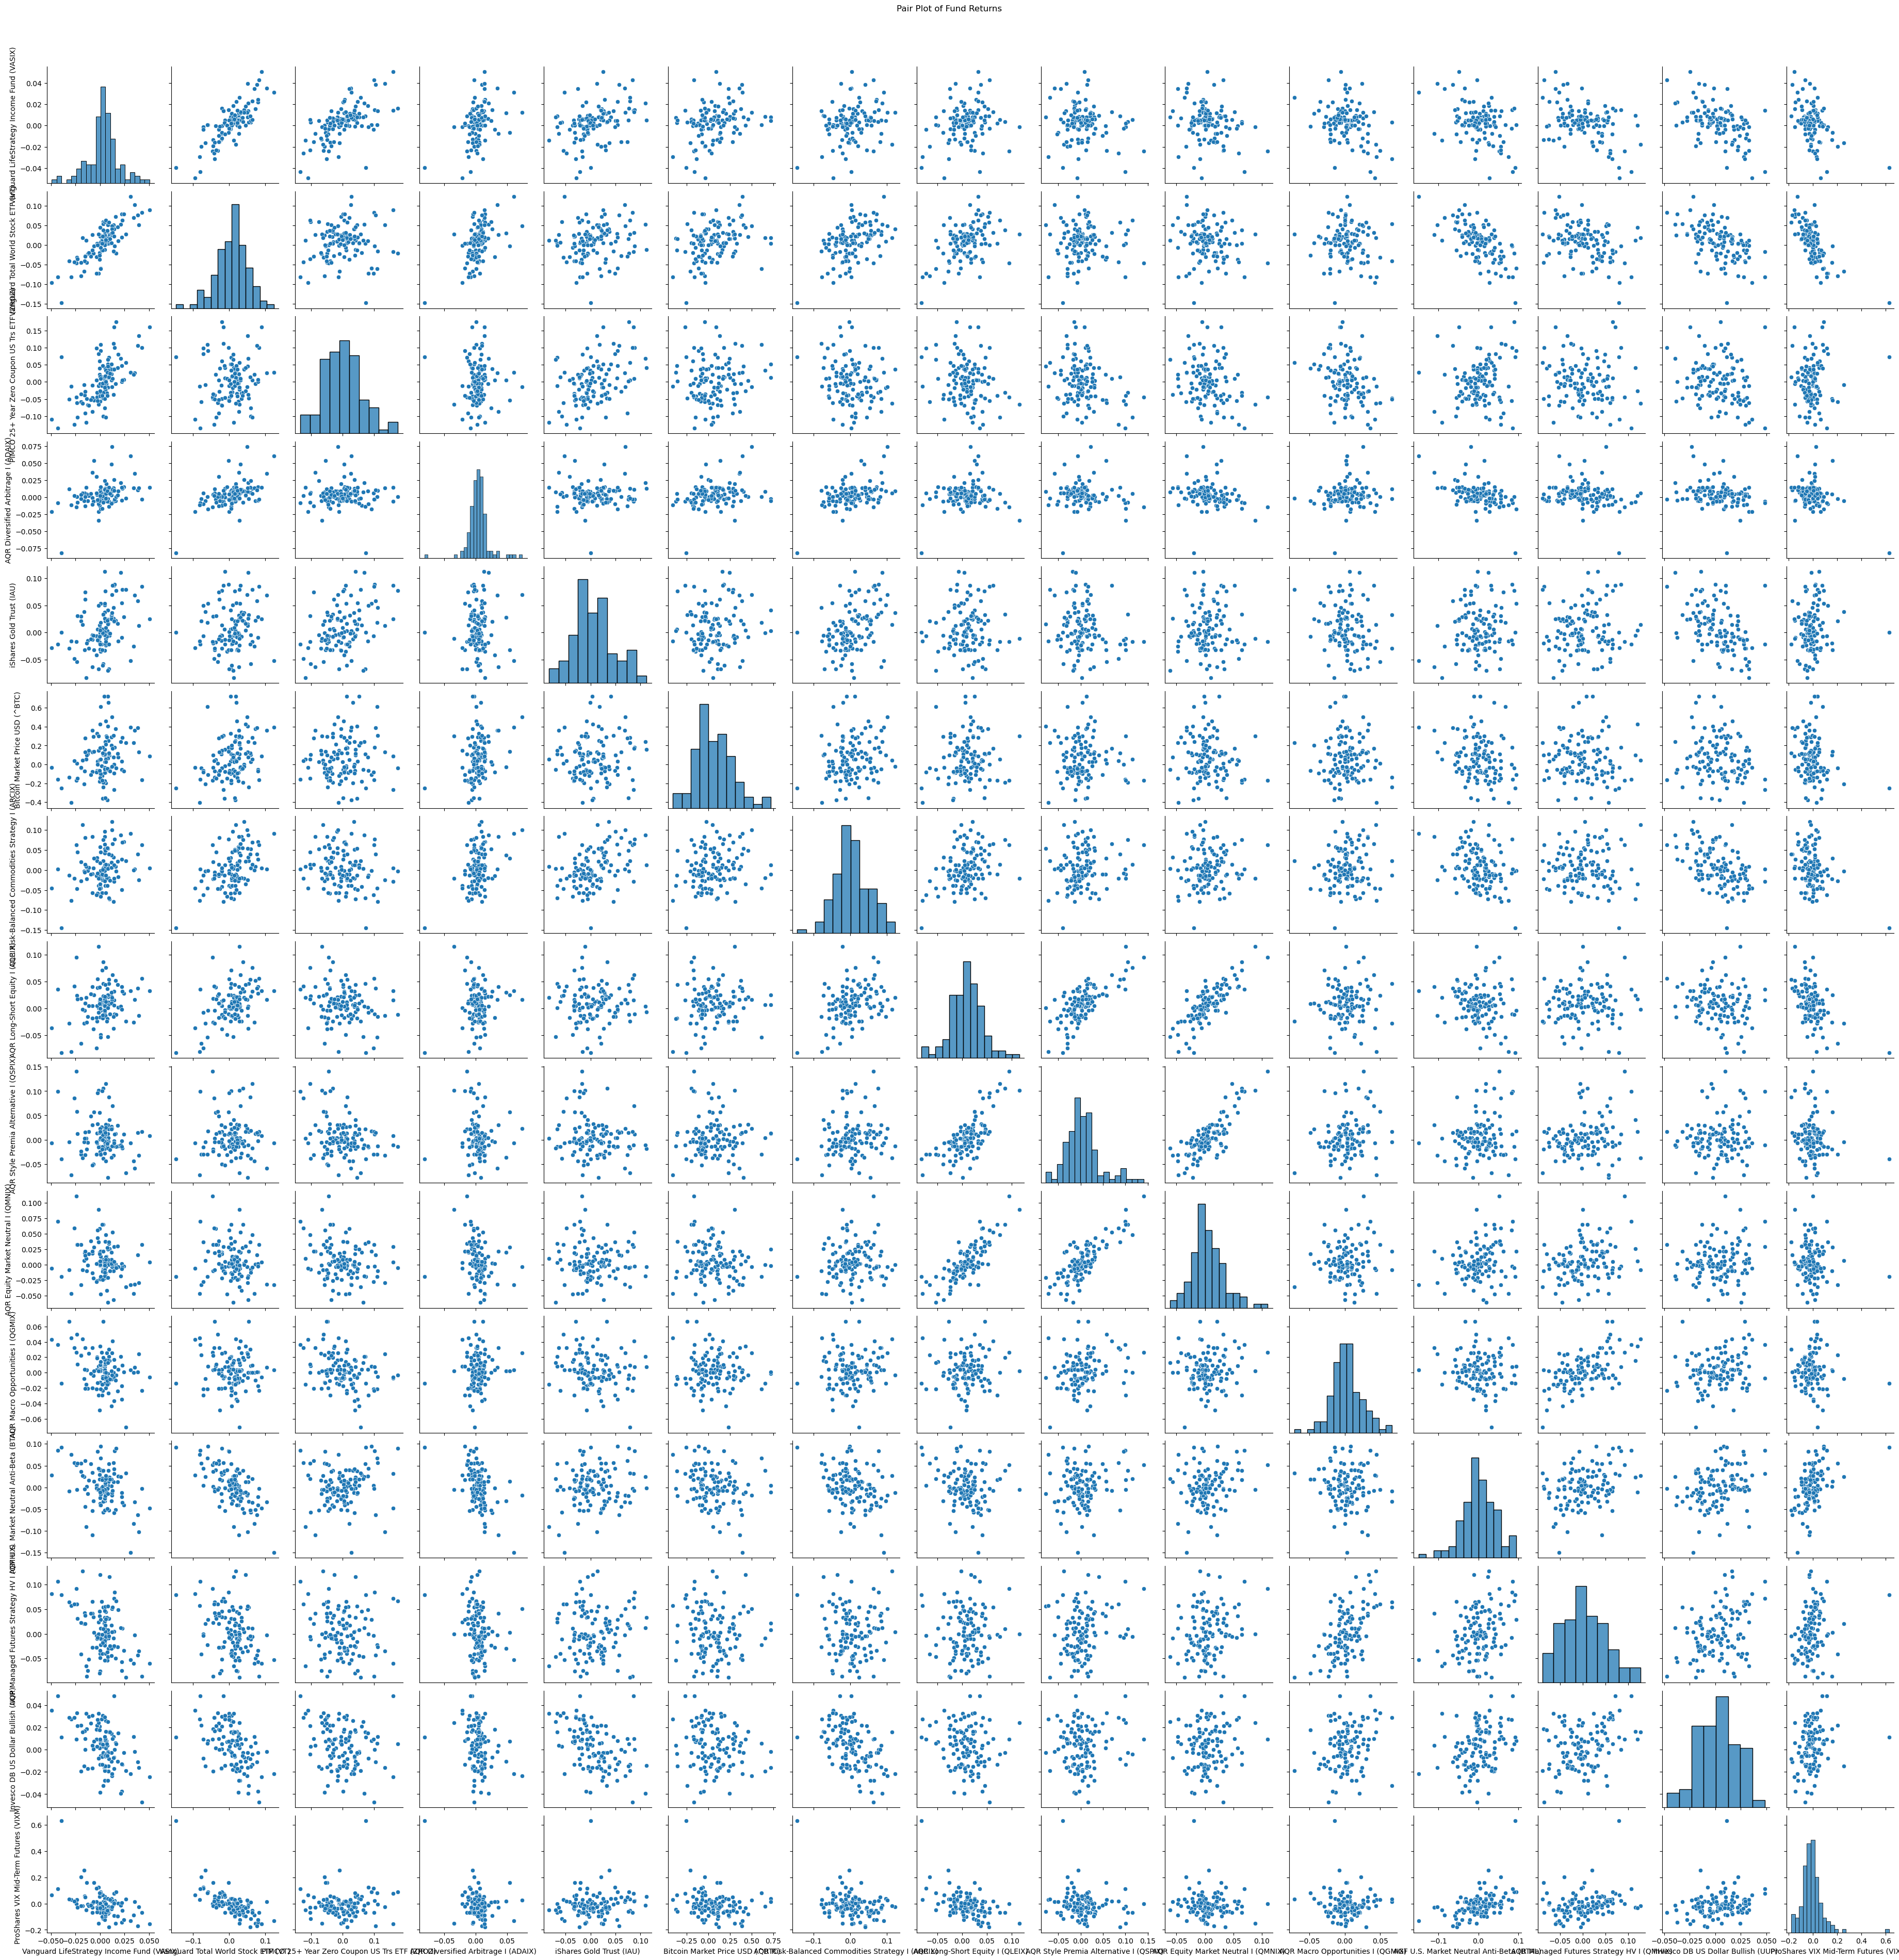

In [13]:
# Carrie Little - AAI5000 Final Project Code
#
# Create a pair plot for the dataset to visualize relationships between funds
import seaborn as sns
pairplot_df = df
sns.pairplot(pairplot_df)
plt.suptitle("Pair Plot of Fund Returns", y=1.02)
plt.show()

Carrie Little - AAI5000 Final Project Code

From ChatGPT

### How to Read Pair Plot
**Key Elements of a Pair Plot:**
Scatter Plots (Off-Diagonal): Each scatter plot shows the relationship between two different funds. Each point represents an observation (a time point) with the return of one fund on the x-axis and the return of another fund on the y-axis.

**Linear Relationships:** A clear upward or downward trend indicates a positive or negative correlation, respectively, between the returns of two funds.
No Pattern: If the points are scattered without any clear direction, this implies little or no correlation between the two funds.
Clusters: Visible clusters or groupings of points may indicate different regimes or types of behavior in the data (e.g., periods of high/low returns).
Histograms (Diagonal): The diagonal plots show the distribution of returns for each fund individually. These are histograms (or sometimes density plots), allowing you to assess the shape of the distribution.

**Normal Distribution:** If the histogram is bell-shaped, the returns of the fund are approximately normally distributed.
Skewness: If the histogram leans to the left or right, the returns are skewed.
Spread: The width of the histogram indicates the variability or volatility of the returns. A wide histogram suggests higher variability (volatility) in returns.

### Interpreting Scatter Plots
**Positive Correlation:** If the points in the scatter plot form an upward-sloping line, it indicates that when the return of one fund increases, the return of the other tends to increase as well. The stronger the correlation, the tighter the points will cluster along the line.

Example: If two funds are positively correlated, investing in both may not diversify risk because their performance moves together.

**Negative Correlation:** A downward-sloping line means the two funds are negatively correlated, where one increases while the other decreases. This can be a sign that the two funds might hedge each other.

Example: If one fund tends to gain when another loses, holding both may reduce portfolio risk.

**No Correlation:** A random scatter of points with no discernible pattern suggests no relationship between the two funds.

### Interpreting Histograms (Diagonal):
**Symmetry:**  Symmetrical histograms show that the returns are balanced around the mean (close to normal distribution).
#### Skewness:
**Right Skewed (Positive Skew):** Most of the returns are concentrated on the left side, with a long tail on the right. This indicates occasional large gains.
**Left Skewed (Negative Skew):** Most returns are concentrated on the right side, with a long tail on the left, indicating occasional large losses.
**Kurtosis (Fat Tails):** If the histogram has high peaks and fat tails, it suggests the presence of extreme values, meaning the fund might experience rare but large fluctuations in returns.

<div class="alert alert-block alert-info">

**References**

Agresti, Alan, and Maria Kateri. Foundations of Statistics for Data Scientists: With R and Python. CRC Press, Taylor & Francis Group, 2022. 

Agresti, Alan, and Maria Kateri. (2022) Appendix B2. Chapter 2: Python for Probability Distributions. In Foundations of Statistics for Data Scientists: With R and Python  (p. 385-389). CRC Press, Taylor & Francis Group, 2022.

ChatGPT, (2024) GPT-4o version, OpenAI. [Large language model]. https://chatgpt.com/

Opportuinty Dataset - need link/website info

 Kenneth French's website. http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

</div>
